<a href="https://colab.research.google.com/github/jvictorferreira3301/Prob-Stat/blob/main/lab02.ipynb" target="_parent">
        <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" style="height: 27px; margin-right: 10px;"/>


**Alunos:**

- João Victor Santos Brito Ferreira - 202207040028

- Kauan Miranda Tavares - 202206840033

- Marco Antônio do Espírito Santo Maués Junior - 202206840038

## O problema:

Os dados referenciados abaixo mostram o diâmetro de Pizzas medidas na Austrália. A pizzaria EagleBoys afirma que suas pizzas são maiores do que as da pizzaria Dominos. Para provar isso, eles realizaram um conjunto de medições e as publicaram. Normalmente, não é esperado que cada pizza produzida por um restaurante tenha exatamente o mesmo tamanho, mas deve-se esperar algo próximo entre as pizzas produzidas. 

Veja que essa não é apenas uma história engraçada. O gerente de uma pizzaria precisa controlar custos e trazer clientela. Considerando duas pizzas de mesmo sabor, tipo de massa e preço, uma pizza maior significa menor lucro naquela pizza, enquanto que uma pizza menor do que o esperado implica em desagradar o cliente. Parece não haver uma estratégia única para determinar a medida certa para manter seu lucro, e isso dá origem à diferentes abordagens pelas pizzarias. Será que veremos estratégias diferentes nestes dados?



### O que fazer?

Agora você vai investigar os dados destas medições. Explore os dados usando o que você aprendeu e anote o que foi observado. Apresente um link de compartilhamento do seu colab, compartilhado para comentários. Ele deve conter código e texto explicativo.

### Questões motivadoras

As questões abaixo não são exaustivas, mas apenas um guia. Tente elaborar suas próprias questões ao analisar os dados.

Que tipos de variáveis temos no conjunto de dados?
Será que a alegação da pizzaria EagleBoys tem alguma base?
O tipo de massa (crust, em inglês) ou o sabor (topping, em inglês) impactam no tamanho da pizza?
Haveria alguma explicação para as diferenças?
Dados

https://github.com/glaucogoncalves/p-e/raw/main/Labs/lab-pizza/ujse_a_11889637_sm1111.zip

#### Mais sobre os dados e o problema

http://jse.amstat.org/v20n1/dunn.pdf


In [17]:
# importação das bibliotecas

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import os
import requests
import zipfile
from scipy.stats import ttest_ind, kruskal

Primeiramente, configuramos o download e descompactação dos dados de interesse:

In [18]:
# url do arquivo
url = "https://github.com/glaucogoncalves/p-e/raw/main/Labs/lab-pizza/ujse_a_11889637_sm1111.zip"
# nome
zip_path = "./data/ujse_a_11889637_sm1111.zip"
# pasta pra onde vai
extract_path = "./data"

# cria a pasta de destino se não existir
os.makedirs(extract_path, exist_ok=True)

# download do arquivo apenas se ele não existir
if not os.path.exists(zip_path):
    response = requests.get(url)
    with open(zip_path, 'wb') as file:
        file.write(response.content)

# descompacta o arquivo
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# remove o zip após a descompactação
os.remove(zip_path)

print("Download e descompactação concluídos.")

Download e descompactação concluídos.


## $I$. Inferências primárias



Fazemos algumas inferências primárias através da biblioteca pandas:

In [19]:
data_pizza = pd.read_csv('data/pizzasize.csv')
data_pizza.describe()

,ID,Diameter
count,250.000000,250.000000
mean,125.972000,28.308200
std,72.941105,1.276376
min,1.000000,25.510000
25%,63.250000,26.885000
50%,125.500000,28.765000
75%,187.750000,29.237500
max,252.000000,31.060000


Na saída da célula acima podemos evidenciar a quantidade de pizzas medidas(`250`), a média do diâmetro (`28,3`) e os percentis dos mesmos. 

In [21]:
print(data_pizza.head(10))

   ID      Store CrustDescription        Topping  Diameter
0   1    Dominos      ThinNCrispy        Supreme     29.40
1   2    Dominos      ThinNCrispy  BBQMeatlovers     29.63
2   3    Dominos          DeepPan       Hawaiian     27.06
3   4    Dominos      ThinNCrispy        Supreme     27.45
4   5    Dominos     ClassicCrust       Hawaiian     26.59
5   6    Dominos          DeepPan  BBQMeatlovers     27.16
6   7  EagleBoys         MidCrust   SuperSupremo     29.15
7   8  EagleBoys          DeepPan       Hawaiian     28.78
8   9  EagleBoys        ThinCrust  BBQMeatlovers     30.05
9  10  EagleBoys          DeepPan  BBQMeatlovers     29.38


Vemos acima as nossas variáveis representadas pelas colunas. 

Podemos ver 3 variaveis categóricas e seus valores distintos que podem ser assumidos, que também podemos entender como o suporte das nossas VAs:
- `Store` : As duas pizzarias em questão.
- `CrustDescription` : Os tipos de massa.
- `Topping`: Os sabores.

E uma variável numérica, tendo em seu suport entre 25.51 e 31.06:

- `Diameter`: $25.51<x<31.06$

In [36]:
print(data_pizza.info()) ########### FALAR DOS NON NULL

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                250 non-null    int64  
 1   Store             250 non-null    object 
 2   CrustDescription  250 non-null    object 
 3   Topping           250 non-null    object 
 4   Diameter          250 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 9.9+ KB
None


Acima podemos ver que não há nenhum dado faltante ou valor nulo para as as variáveis em questão.

In [22]:
print(data_pizza['Store'].unique())
print(data_pizza['CrustDescription'].unique())
print(data_pizza['Topping'].unique())

['Dominos' 'EagleBoys']
['ThinNCrispy' 'DeepPan' 'ClassicCrust' 'MidCrust' 'ThinCrust']
['Supreme' 'BBQMeatlovers' 'Hawaiian' 'SuperSupremo']


Na saída acima vemos as classes das variáveis categóricas.

## $II$. Tratamento de dados

Fazendo uma leitura do `data/pizzasize.txt`, mais especificamente na seção `SPECIAL NOTES` descobrimos que os tipos de massa `'ClassicCrust'` e `'MidCrust'` referem-se ao mesmo tipo de massa porém com os nomes específicos que recebem em cada pizzaria, continuando a leitura do trecho descobrimos que o mesmo vale para as massas `'ThinNCrispy'` e `'ThinCrust'` e para os sabores `'Supreme'` e `'SuperSupremo'`.


Por conta disso, faz-se necessário um tratamento nos dados, aglutinando as classes que correspondem a mesma coisa, porém com nomes diferentes, na célula de código abaixo realizamos essa aglutinação:

In [23]:
# Substituir valores 
data_pizza['CrustDescription'] = data_pizza['CrustDescription'].replace({
    'ClassicCrust': 'Mid',
    'MidCrust': 'Mid',
    'ThinNCrispy': 'Thin',
    'ThinCrust': 'Thin'
})

data_pizza['Topping'] = data_pizza['Topping'].replace({
    'Supreme': 'Supreme',
    'SuperSupremo': 'Supreme'
})

# Verificar as alterações
print(data_pizza['Store'].unique())
print(data_pizza['CrustDescription'].unique())
print(data_pizza['Topping'].unique())

['Dominos' 'EagleBoys']
['Thin' 'DeepPan' 'Mid']
['Supreme' 'BBQMeatlovers' 'Hawaiian']


Agora há apenas 3 valores/classes possíveis para as colunas `Topping` e `CrustDescription` e as análises posteriores podem ser vistas mais facilmente.

In [24]:
print(data_pizza.info()) ########### FALAR DOS NON NULL

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                250 non-null    int64  
 1   Store             250 non-null    object 
 2   CrustDescription  250 non-null    object 
 3   Topping           250 non-null    object 
 4   Diameter          250 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 9.9+ KB
None


## $III$. Será que a alegação da pizzaria EagleBoys tem alguma base?


Para avaliar se a afirmação da pizzaria EagleBoys faz sentido vamos calcular na célula abaixo a média do diâmetro (variável `Diameter`) das pizzas medidas de cada pizzaria (variável `Store`):

In [25]:
# Compare the average diameter of pizzas from different stores
mean_diameter_by_store = data_pizza.groupby('Store')['Diameter'].mean()
print(mean_diameter_by_store)

Store
Dominos      27.44208
EagleBoys    29.17432
Name: Diameter, dtype: float64


Como podemos visualizar, de fato, em média a pizzaria EagleBoys tem pizzas com diâmetros maiores, fato que corrobora a alegação.

Para vermos essa superioridade de maneira mais visual podemos plotar um _boxplot_ com a distribuição dos diâmetros das pizzas por pizzaria:

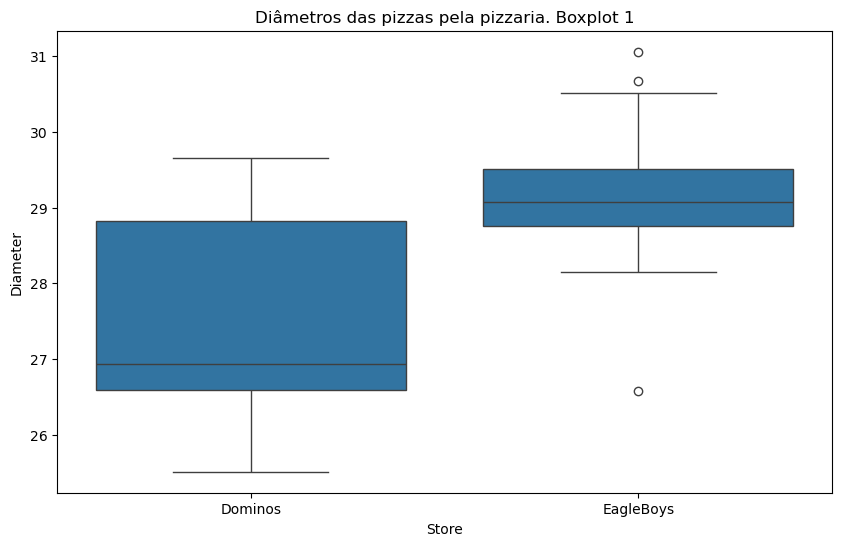

In [26]:
# boxplot do diametro pela pizzaria
plt.figure(figsize=(10, 6))
sns.boxplot(x='Store', y='Diameter', data=data_pizza)
plt.title('Diâmetros das pizzas pela pizzaria. Boxplot 1')
plt.show()

Podemos notar que mesmo os _outliers_ corroboram também com a afirmação da pizzara EagleBoys.

Outra questão que podemos inferir com este _boxplot_ é que a pizzaria Dominos apresenta a maior variação no diâmetro das pizzas. A distância entre o quartil inferior e o quartil superior é maior em comparação com a pizzaria EagleBoys, e os 'bigodes' também são mais longos, indicando uma maior dispersão dos dados. Para provar isso, vejamos a célula abaixo:

In [27]:
# ffiltragem
eagleboys_diameter = data_pizza[data_pizza['Store'] == 'EagleBoys']['Diameter']
dominos_diameter = data_pizza[data_pizza['Store'] == 'Dominos']['Diameter']

# variância e o desvio padrão
eagleboys_variance = eagleboys_diameter.var()
dominos_variance = dominos_diameter.var()

eagleboys_std = eagleboys_diameter.std()
dominos_std = dominos_diameter.std()

# resultados
print(f"EagleBoys - Variância: {eagleboys_variance}, Desvio Padrão: {eagleboys_std}")
print(f"Dominos - Variância: {dominos_variance}, Desvio Padrão: {dominos_std}")

EagleBoys - Variância: 0.3922553806451615, Desvio Padrão: 0.6263029463807124
Dominos - Variância: 1.3667295096774188, Desvio Padrão: 1.16907207206289


Os cálculos mostram que a variância e o desvio padrão dos diâmetros das pizzas da Dominos são significativamente maiores do que os da EagleBoys. Isso confirma quantitativamente que a pizzaria Dominos apresenta maior variação no diâmetro das pizzas em comparação com a pizzaria EagleBoys, corroborando a observação feita a partir do boxplot.

## $IV$. O tipo de massa ou o sabor impactam no tamanho da pizza?

Para provar se o tipo de massa ou o sabor impactam no tamanho da pizza, podemos utilizar estatísticas descritivas para comparar os diâmetros das pizzas entre os diferentes tipos de massa e sabores, essas estatísticas podem ser vistas nos _boxplots_ posteriores.

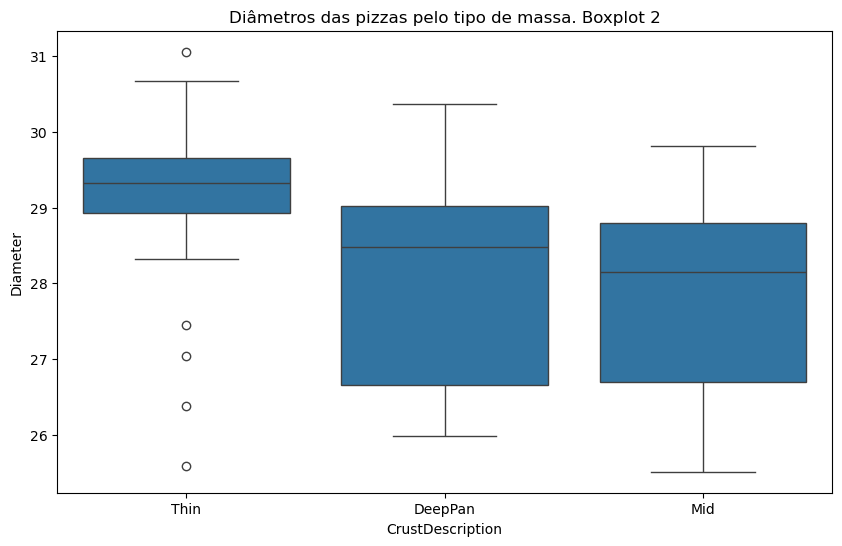

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='CrustDescription', y='Diameter', data=data_pizza)
plt.title('Diâmetros das pizzas pelo tipo de massa. Boxplot 2')
plt.show()

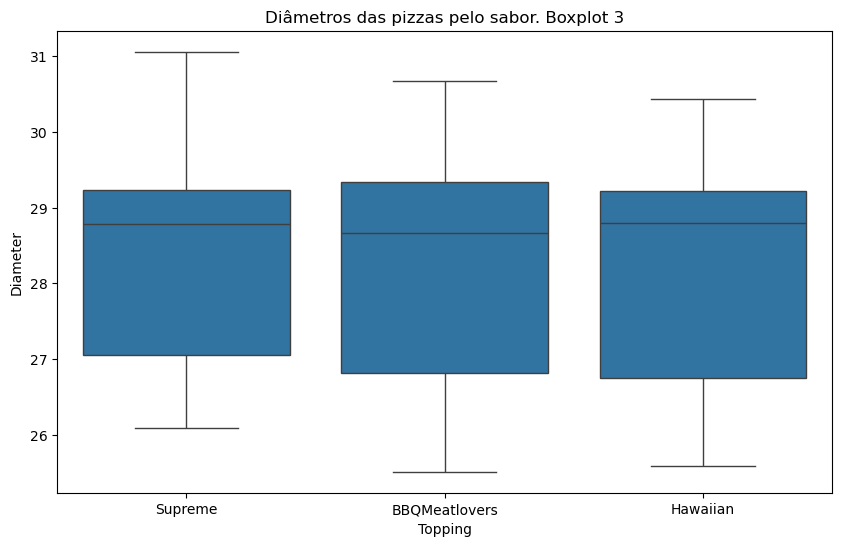

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Topping', y='Diameter', data=data_pizza)
plt.title('Diâmetros das pizzas pelo sabor. Boxplot 3')
plt.show()

Nos gráfico gerados, cada caixa representa a distribuição dos diâmetros das pizzas para um tipo específico de massa (no _Boxplot_ 2) ou sabor (No _Boxplot_ 3). A linha dentro de cada caixa indica a mediana do diâmetro das pizzas para aquele tipo de massa (ou sabor). As extremidades da caixa representam o primeiro e o terceiro quartis, enquanto os "bigodes" se estendem até os valores mínimos e máximos, excluindo os outliers, que são representados por pontos individuais.

A análise visual dos _Boxplots_ revela que há variações significativas nos diâmetros das pizzas entre os diferentes tipos de massa (e sabores). Essas variações são evidenciadas pelas diferenças nas medianas e pela amplitude das distribuições dos diâmetros.

Essas observações corroboram com a afirmação de que a massa e sabor impactam significativamente o diâmetro das pizzas (Estatística=118.07, Valor-p=1.3747861451326749e-24). Portanto, podemos concluir que o tipo de massa e sabor são fatores determinantes no tamanho das pizzas oferecidas.


Nas células podemos ver a mesma inferência de outras maneiras como pelo gŕafico de densidade.

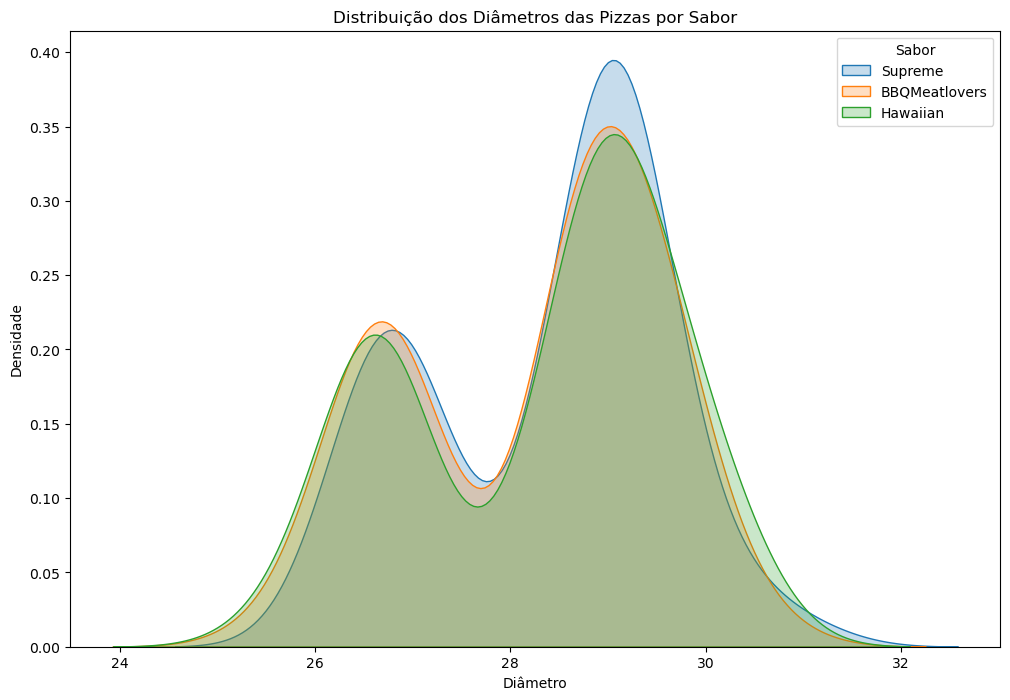

In [32]:
plt.figure(figsize=(12, 8)) ########### FALAR DA MULTIMODADLIDADE
for topping in data_pizza['Topping'].unique():
    subset = data_pizza[data_pizza['Topping'] == topping]
    sns.kdeplot(subset['Diameter'], label=topping, fill=True)
plt.title('Distribuição dos Diâmetros das Pizzas por Sabor')
plt.xlabel('Diâmetro')
plt.ylabel('Densidade')
plt.legend(title='Sabor')
plt.show()

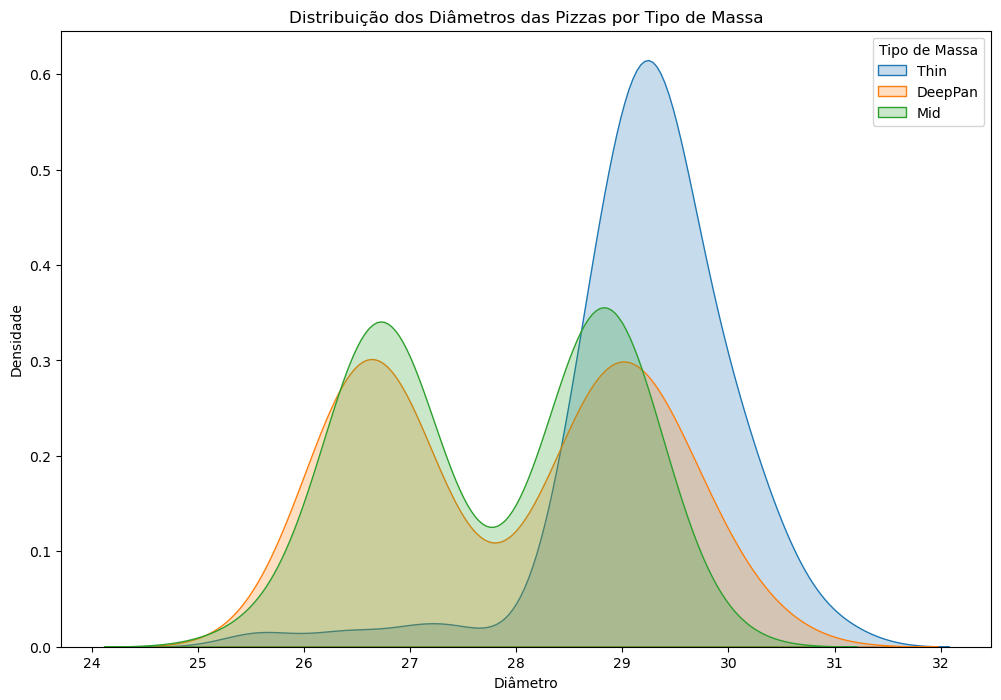

In [33]:
plt.figure(figsize=(12, 8))
for crust in data_pizza['CrustDescription'].unique():
    subset = data_pizza[data_pizza['CrustDescription'] == crust]
    sns.kdeplot(subset['Diameter'], label=crust, fill=True)
plt.title('Distribuição dos Diâmetros das Pizzas por Tipo de Massa')
plt.xlabel('Diâmetro')
plt.ylabel('Densidade')
plt.legend(title='Tipo de Massa')
plt.show()

Os gráficos de densidade resultantes mostram como os diâmetros das pizzas são distribuídos para cada tipo de massa e sabor. Cada curva representa a distribuição de diâmetros para um tipo específico de massa e sabor, permitindo comparar visualmente as distribuições entre os diferentes tipos de massa.

- **Picos das Curvas:** Indicam os diâmetros mais comuns para cada tipo de massa, ou moda.

- **Largura das Curvas:** Indica a variabilidade dos diâmetros para cada tipo de massa. Curvas mais largas sugerem maior variabilidade, enquanto curvas mais estreitas indicam menor variabilidade.

- **Áreas Preenchidas:** Facilitam a visualização das distribuições e ajudam a identificar rapidamente as diferenças entre os tipos de massa.

Uma observação pertinente quanto aos Picos das Curvas: é que, para a mesma distribuição, podemos ver dois picos. Isso indica que a distribuição é multimodal, o que implica que provavelmente há um subconjunto na distribuição. No nosso caso, podemos dizer que o subconjunto em questão seria as pizzarias, já que cada uma tem sua própria moda.



Por último, os _boxplots_ extras seguintes permitem comparar a distribuição dos diâmetros das pizzas para diferentes combinações de tipo de massa e sabor pela pizzaria que pertecem. Com isto concluímos que a massa impacta mais que o sabor no diâmetro das pizzas medidas:

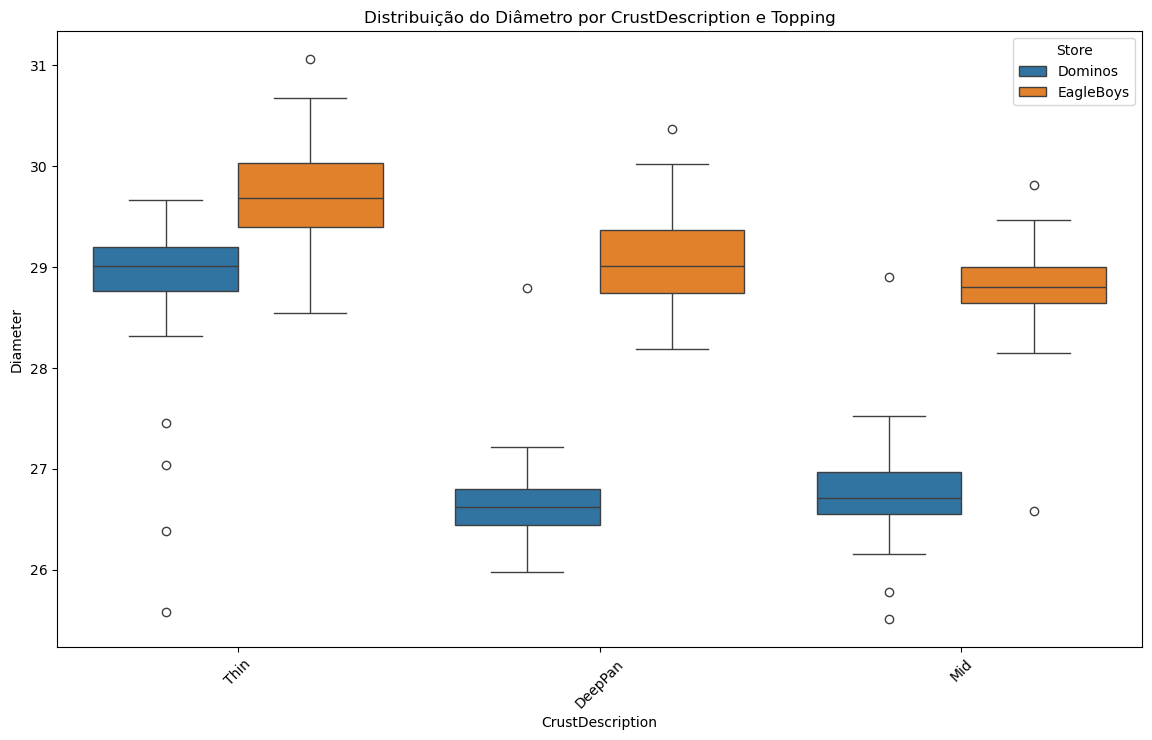

In [34]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=data_pizza, x='CrustDescription', y='Diameter', hue='Store')
plt.title('Distribuição do Diâmetro por CrustDescription e Topping')
plt.xticks(rotation=45)
plt.show()

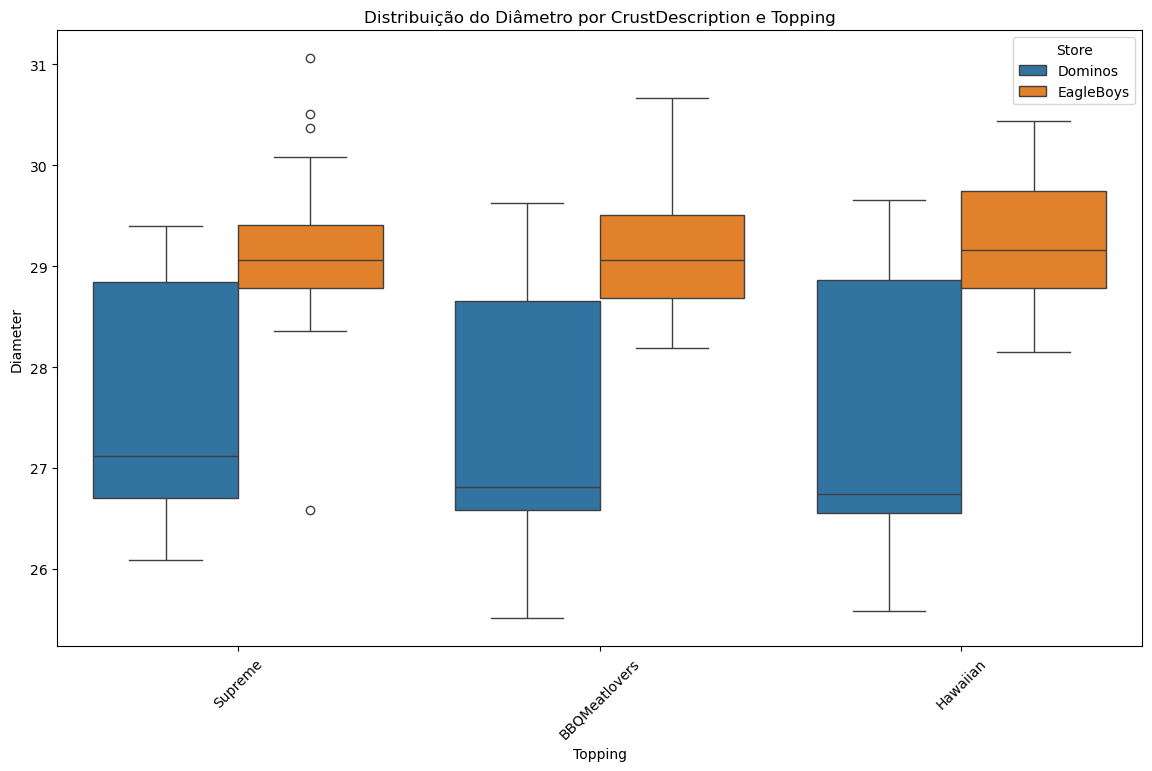

In [35]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=data_pizza, x='Topping', y='Diameter', hue='Store')
plt.title('Distribuição do Diâmetro por CrustDescription e Topping')
plt.xticks(rotation=45)
plt.show()